# Causal Artificial Intelligence

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [2]:
list_cols = ["NU_IDADE", "TP_SEXO", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "TP_ESCOLA", "TP_ENSINO", "TP_LINGUA", 
             "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

# "TP_STATUS_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5",
# "CO_MUNICIPIO_RESIDENCIA", "CO_UF_RESIDENCIA",
# "CO_MUNICIPIO_NASCIMENTO", "CO_UF_NASCIMENTO", "TP_NACIONALIDADE", 

raw_data = pd.read_csv("/home/vincent/Documents/notebooks/data/MICRODADOS_ENEM_2019.csv",
                       sep=";", usecols=list_cols, encoding="ISO-8859-1", nrows=100)
raw_data.head(5)

,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO
0,21,M,1,3,1,3,1,NaN,472.9,466.0,497.3,369.1,0,780.0
1,16,F,1,3,3,0,1,NaN,358.9,495.4,482.3,416.5,1,600.0
2,18,F,1,1,2,0,3,1.0,574.2,538.7,582.6,571.5,0,640.0
3,23,M,0,3,2,0,2,1.0,NaN,NaN,NaN,NaN,1,NaN
4,23,M,1,3,1,5,1,1.0,NaN,NaN,NaN,NaN,1,NaN


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_IDADE         100 non-null    int64  
 1   TP_SEXO          100 non-null    object 
 2   TP_ESTADO_CIVIL  100 non-null    int64  
 3   TP_COR_RACA      100 non-null    int64  
 4   TP_ST_CONCLUSAO  100 non-null    int64  
 5   TP_ANO_CONCLUIU  100 non-null    int64  
 6   TP_ESCOLA        100 non-null    int64  
 7   TP_ENSINO        61 non-null     float64
 8   NU_NOTA_CN       79 non-null     float64
 9   NU_NOTA_CH       82 non-null     float64
 10  NU_NOTA_LC       82 non-null     float64
 11  NU_NOTA_MT       79 non-null     float64
 12  TP_LINGUA        100 non-null    int64  
 13  NU_NOTA_REDACAO  82 non-null     float64
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [4]:
raw_data.dropna(inplace=True)

struct_data = raw_data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO
2,18,0,1,1,2,0,3,1.0,574.2,538.7,582.6,571.5,0,640.0
5,31,1,1,1,1,7,1,1.0,522.0,592.6,582.0,605.3,1,580.0
6,30,0,2,3,1,10,1,1.0,407.4,480.1,464.3,581.5,1,360.0
7,26,0,0,3,2,0,2,1.0,369.7,398.2,395.6,473.8,0,480.0
10,21,1,1,0,1,1,1,1.0,477.6,596.9,549.7,583.2,0,900.0


In [5]:
sm = from_pandas(struct_data, max_iter=50)

In [ ]:
# sm.remove_edges_below_threshold(0.8)

/home/vincent/.local/lib/python3.6/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'NU_IDADE', graph '' size too small for label
libpath/shortest.c:200: destination point not in any triangle
libpath/shortest.c:192: source point not in any triangle
libpath/shortest.c:200: destination point not in any triangle
libpath/shortest.c:192: source point not in any triangle
libpath/shortest.c:200: destination point not in any triangle
libpath/shortest.c:200: destination point not in any triangle

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/vincent/.local/lib/python3.6/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'NU_IDADE', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


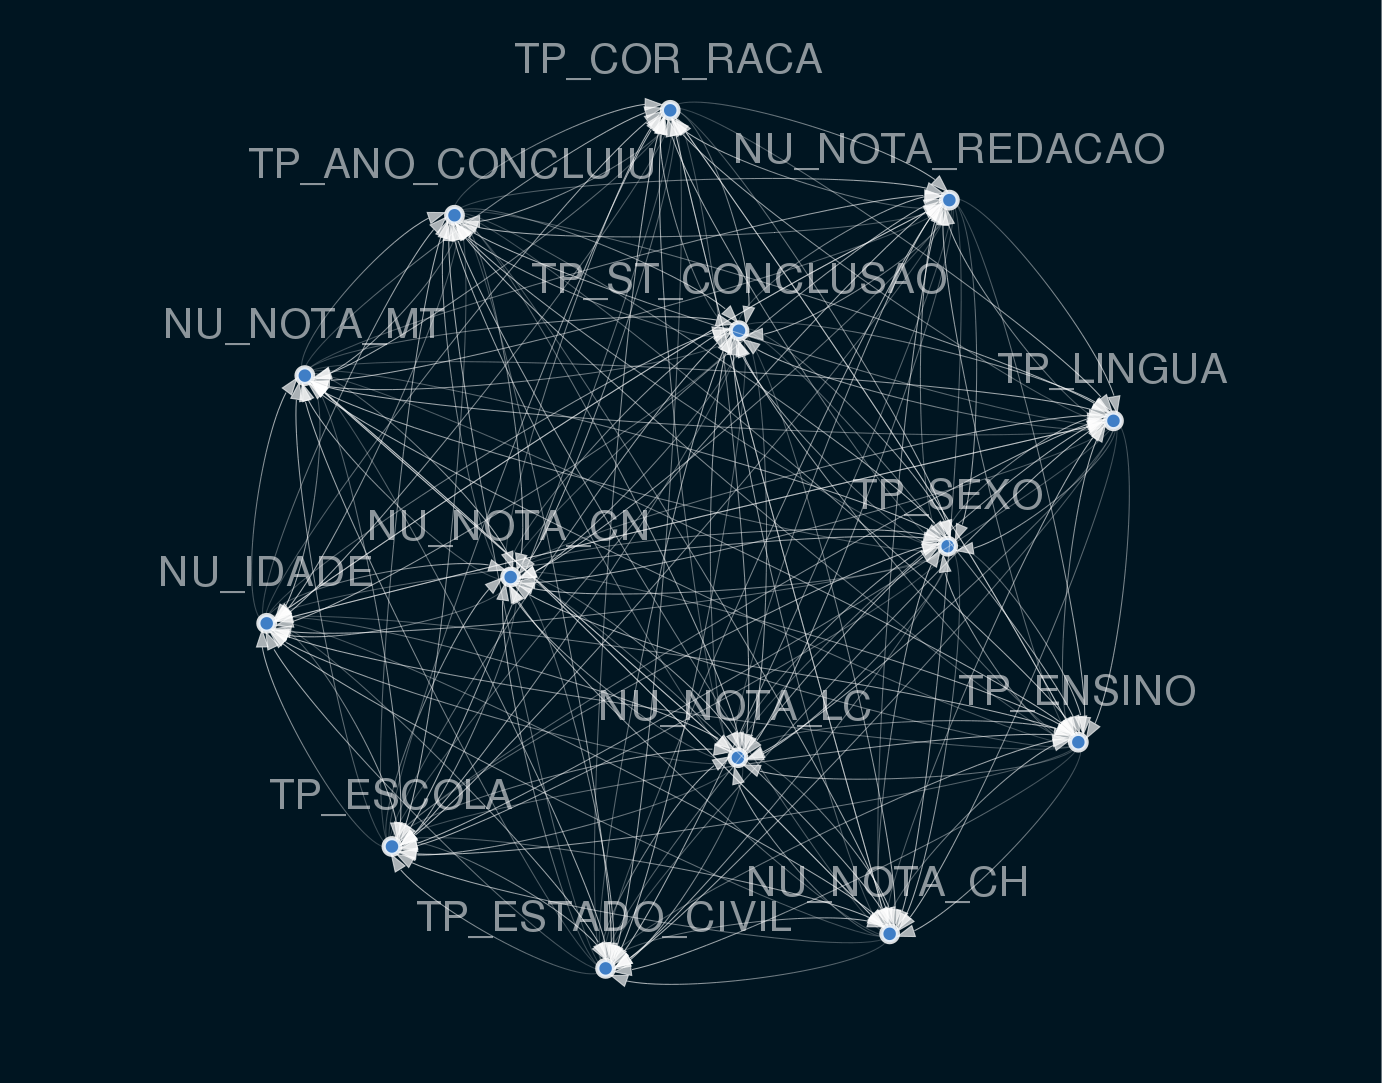

In [6]:
viz = plot_structure(
    sm,
#     graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)

Image(viz.draw(format='png'))